In [2]:
#########################################################
#########################################################
#########################################################
#########################################################
#########################################################


# Run after running the individual seminar notebooks


#########################################################
#########################################################
#########################################################
#########################################################
#########################################################


%run "./0b Seminar Comp Plots Imports.ipynb"


astropy 5.1
reproject 0.9.1
spectral_cube 0.6.1.dev247+ge29d254


4.3
5 5 2 0 2 2
(220,)
CMZ fit params and covariance: [2.96543406 0.72659516] [[ 0.06353033 -0.00742559]
 [-0.00742559  0.00093664]]
NGC253 fit params and covariance: [4.35087535 0.73553595] [[ 0.03474577 -0.00373604]
 [-0.00373604  0.00047938]]
0 5 5 2 0 0 2 2 Clear
HCO+_1_0


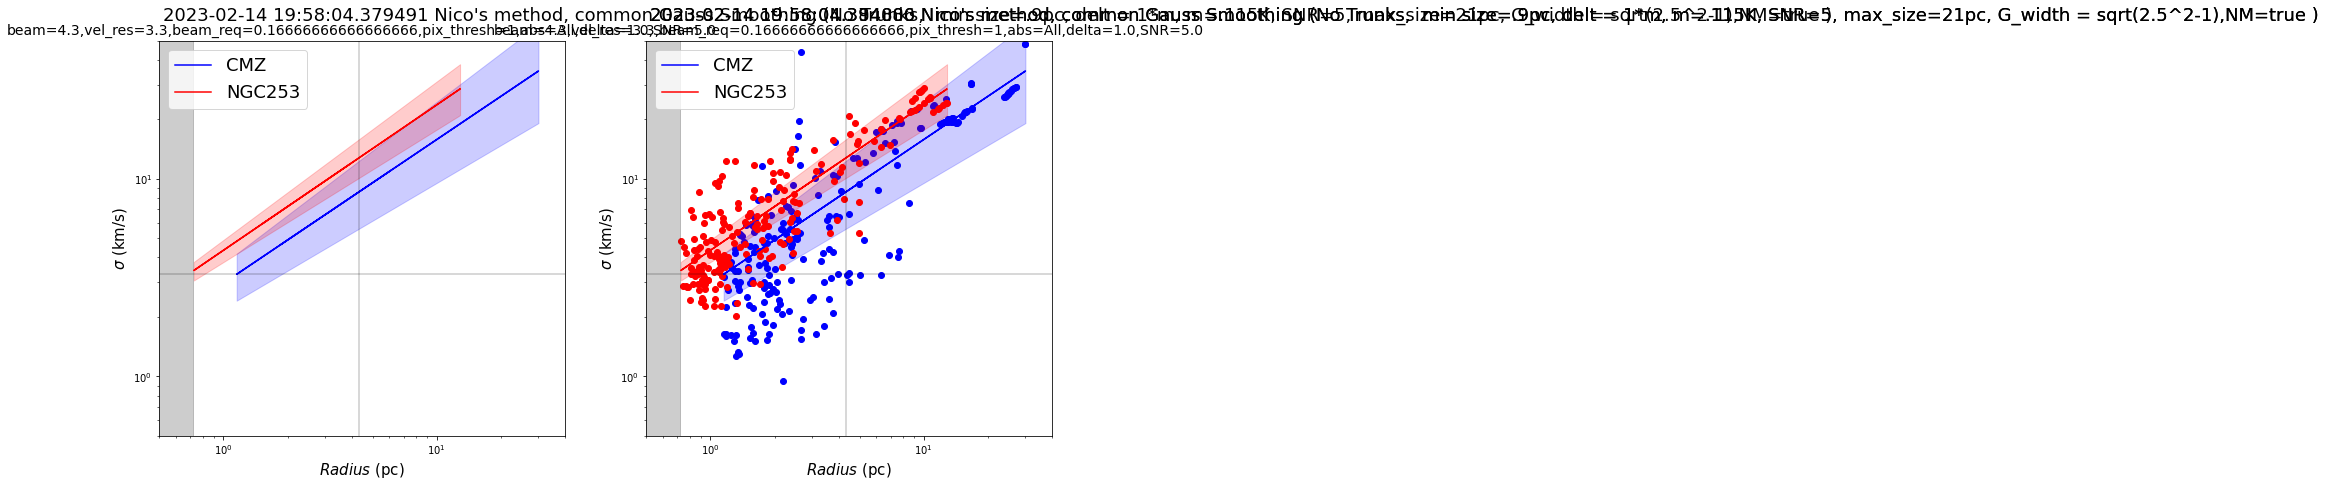

4.3
5 5 2 0 2 2
(412,)
CMZ fit params and covariance: [2.98962749 0.75370357] [[ 0.01923192 -0.00210915]
 [-0.00210915  0.00024912]]
NGC253 fit params and covariance: [4.43043846 0.76748978] [[ 0.0356971  -0.00356534]
 [-0.00356534  0.00041782]]
1 5 5 2 0 0 2 2 Clear
HCN_1_0


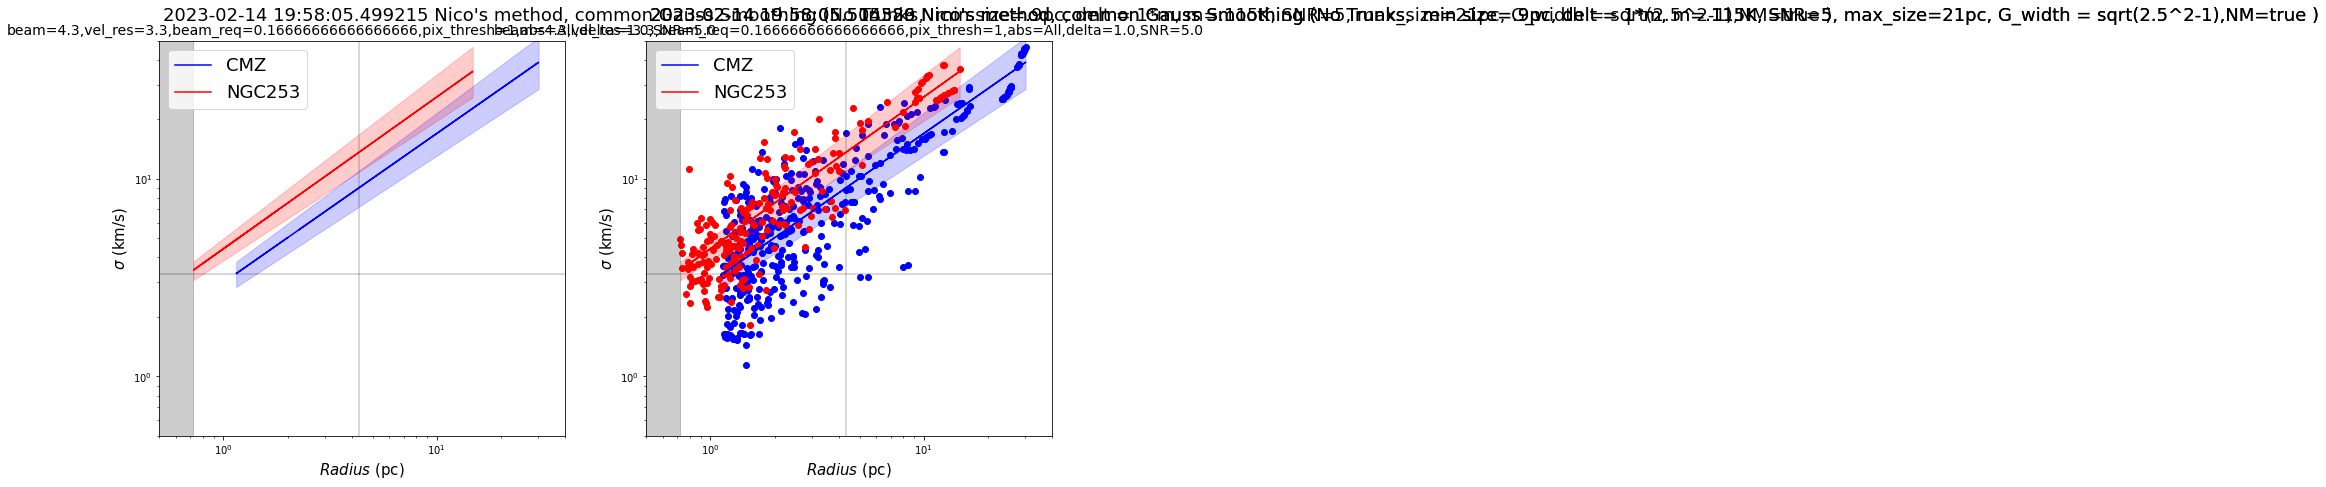

4.3
5 5 2 0 2 2
(497,)
CMZ fit params and covariance: [2.31016747 0.79823027] [[ 0.02199199 -0.00432223]
 [-0.00432223  0.00095744]]
NGC253 fit params and covariance: [3.33507326 0.79884761] [[ 0.03209427 -0.0045516 ]
 [-0.0045516   0.00083355]]
5 5 5 2 0 0 2 2 Clear
CO_J3


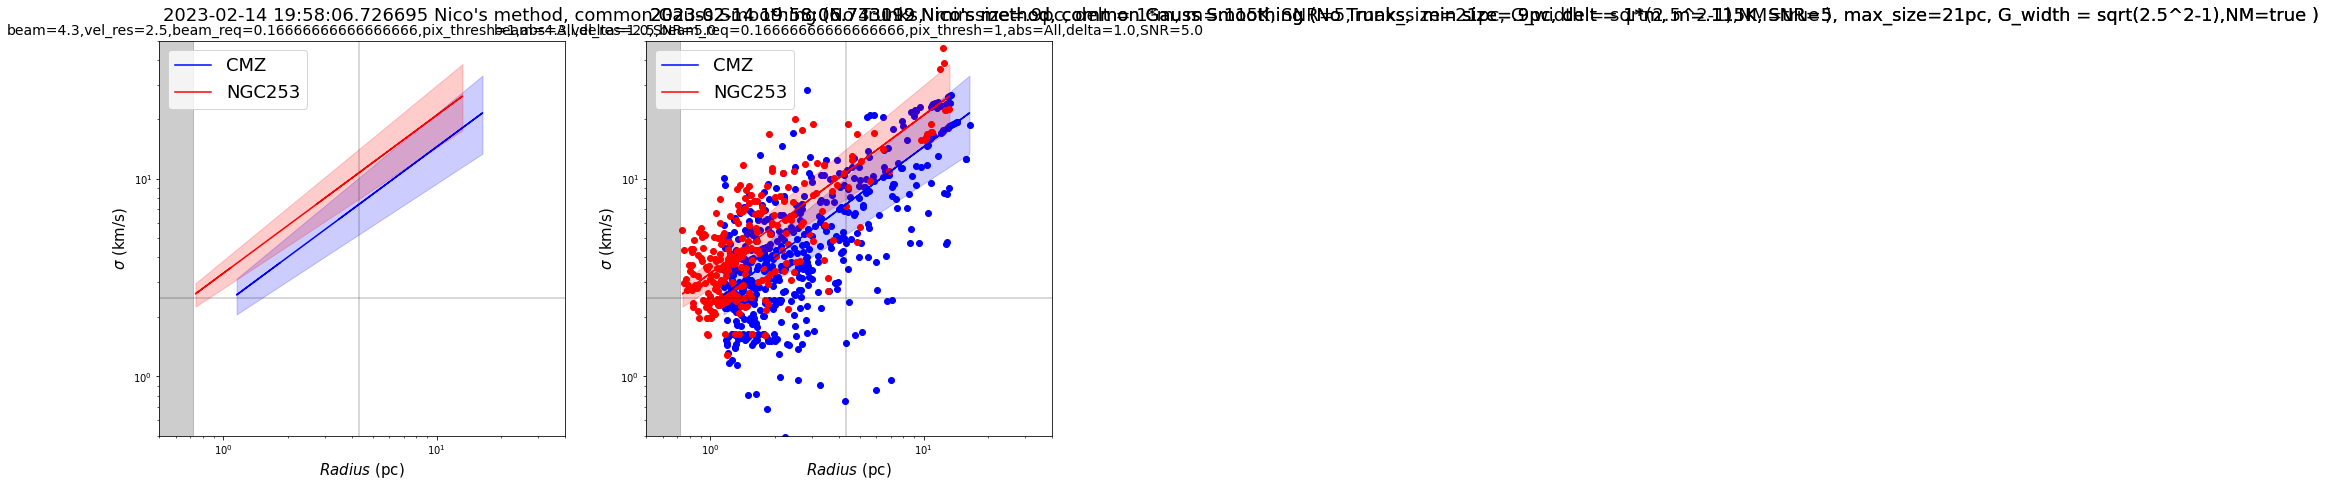

In [4]:

#All, all abs levels
#Newest method
#SL cmz


CMZLs = ["HCO+_1_0","HCN_1_0",'H13CN_1_0','H13CO+_1_0',"CO_3_2",'CO_J3']




Line_Names = ['_NGC_HCOp_J1_0_','_NGC_HCN_J1_0_','','','','_NGC_CO_J3_2_']


CMZNames=["CMZ_HCO+_J1_0_all_Cropped_4.3pc_beam__CMZ_HCO_J1_0_4.3_start70x360pc_3.3_vel_res_0.26666666666666666_beam_size_req_1_times_beam_pixels_1.0_delt_factor_5.0_SNR_NEW.fits",
         "CMZ_HCN_J1_0_all_Cropped_4.3pc_beam__CMZ_HCN_J1_0_4.3_start70x360pc_3.3_vel_res_0.26666666666666666_beam_size_req_1_times_beam_pixels_1.0_delt_factor_5.0_SNR_NEW.fits",
         "","","",
         "CMZ_CO_J3_2_all_NEW_Cropped_4.3pc_beam__CMZ_CO_J3_2_4.3_startSmoothe_to_3.3Edges70x360pc_3.3_vel_res_0.26666666666666666_beam_size_req_1_times_beam_pixels_1.0_delt_factor_5.0_SNR_NEW.fits"]
NGCNames=["HCO+ J1-0_Abs_New_Cropped_4.3pc_beam__NGC_HCOp_J1_0_70x360pc_3.3_vel_res_0.16666666666666666_beam_size_req_1_times_beam_pixels_1.0_delt_factor_5.0_SNR.fits",
         "HCN J1-0_Abs_New_Cropped_4.3pc_beam__NGC_HCN_J1_0_70x360pc_3.3_vel_res_0.16666666666666666_beam_size_req_1_times_beam_pixels_1.0_delt_factor_5.0_SNR.fits",
         "","","",
         "CO 3-2_Abs_New_4.3_start_Cropped_4.3pc_beam__NGC_CO_J3_2_70x360pc_3.3_vel_res_0.16666666666666666_beam_size_req_1_times_beam_pixels_1.0_delt_factor_5.0_SNR.fits"]


Abs_Levels = ["All","None","No Clusters", "None (m)", "None All Channels"]
Suffixes=['','_NA','_No_Clusters','None_m','None_All_Channels']
savePath='/home/ben/Documents/Grad Stuff/MM data/Result Files'
NM_mod=''

Plot=True
for i in range(0,6):
    
    
    
    
    Params=np.genfromtxt(os.path.join(savePath,"_NGC_CO_J3_2_"+"_Params"))
    iterations,iter_factor,ovs,min_vel,FOV,Min_res,Min_beam_req = int(Params[0]),Params[1],int(Params[2]),Params[3],np.array(Params[4]),Params[5],Params[6]
    iterations=6
    for kl in range(5,6):
        
        if(Line_Names[i]==''):
            break
    
        
        
        Prime_Beam = Min_res*((kl*iter_factor+1))#
        if(kl==5):
            if(i==5):
                Prime_Beam=4.3
            else:
                Prime_Beam=4.3
        print(Prime_Beam)
    
    
        for km in range(5,6):
            
            vel_prime = min_vel*((km*iter_factor+1))
            
            if(km==5):
                if(i==5):
                    vel_prime=2.5
                else:
                    vel_prime=3.3
            fig = plt.figure(1,figsize=(16,16))
            gs0 = gridspec.GridSpec(len(Suffixes), 1, figure=fig)
            
            
            
            min_space=np.array([[np.full(100,Prime_Beam/ovs)],[np.linspace(-100,1000,100)]])
            Beams_s=np.array([[np.full(100,Prime_Beam)],[np.linspace(-100,1000,100)]])
            spec=np.array([[np.linspace(-100,1000,100)],[np.full(100,vel_prime)]])
            zeroes=np.array([[np.full(100,0)]])
            
            
            for k5 in range(0,1):

                
                
                
                Suffix=Suffixes[k5]
                Abs_Level =Abs_Levels[k5]

                
                

                
                
                
                
                
                
                
                gs00 = gridspec.GridSpecFromSubplotSpec(iterations, iterations, subplot_spec=gs0[k5])

                
                

                for k3 in range(2,3):

                    beam_req = Min_beam_req*(k3+1)
                    if kl==5:
                        beam_req=.5/3
                    
                    beam_req_line = Beams_s*beam_req
                    for k4 in range(0,1):
                        for k6 in range(2,3):
                            delt_factor = (3/5+k6/5)

                            for k7 in range(2,3):
                                noise_factor = (3/5+k7/5)
                                
                                
                                print(kl,km,k3,k4,k6,k7)
                                
                                
                                ax = fig.add_subplot(2,2,1)
                                ax2 = fig.add_subplot(2,2,2)

                                try:

                                    pix_thresh_factor = k4+1

                                    Name = CMZNames[i]
                                    
                                    








                                    rname=Name+"Radii"

                                    sname=Name+"Sigmas"

                                    sEname=Name+"V_err"

                                    radsBase=[[],[]]
                                    sigsBase=[[],[]]

                                    sigs_err_Base=[[],[]]
                                    radsBase[0],radsBase[1] = np.genfromtxt(os.path.join(savePath,rname+"_Leaves"+Suffix))*10**6, np.genfromtxt(os.path.join(savePath,rname+"_Branches"+Suffix))*10**6#km/s
                                    sigsBase[0] ,sigsBase[1] = np.genfromtxt(os.path.join(savePath,sname+"_Leaves"+Suffix)),np.genfromtxt(os.path.join(savePath,sname+"_Branches"+Suffix))#km/s
                                    
                                    sigs_err_Base[0] ,sigs_err_Base[1] = np.genfromtxt(os.path.join(savePath,sEname+"_Leaves"+Suffix)),np.genfromtxt(os.path.join(savePath,sEname+"_Branches"+Suffix))#km/s



                                    er_r=3 








                                    rads=np.concatenate((radsBase[0],radsBase[1]))
                                    sigs = np.concatenate((sigsBase[0],sigsBase[1]))
                                    sigs_err = np.concatenate((sigs_err_Base[0],sigs_err_Base[1]))
                                    print(np.shape(rads))

                                    from scipy.optimize import curve_fit

                                    def func(R,a,b):
                                        return a*R**(b)

                                    x   =  rads
                                    y     = sigs
                                    y_err = sigs_err

                                    try:
                                        
                                        (Vars, CoVar) = (curve_fit(func, x, y, ))
                                    except:
                                        (Vars, CoVar) = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
                                    np.savetxt(os.path.join(savePath,Name+"_CMZ_Coeffs"+Suffix+NM_mod), Vars,fmt='%s')
                                    np.savetxt(os.path.join(savePath,Name+"_CMZ_Coeff_CoVar"+Suffix+NM_mod),CoVar ,fmt='%s')

                                    np.savetxt(os.path.join(savePath,Name+"_CMZ_Fit_weights"+Suffix+NM_mod),[(len(sigs))] ,fmt='%s')
                                    
                                    
                                    fx = np.linspace(min(x),max(x),50)
                                    if Plot:
                                        print("CMZ fit params and covariance:",Vars,CoVar)
                                        gggg=ax.plot(x,func(x,Vars[0],Vars[1]),color="Blue",label="CMZ")
                                        ax.fill_between(fx,func(fx,Vars[0]+np.sqrt(CoVar[0][0])*er_r,Vars[1]+np.sqrt(CoVar[1][1])*er_r),func(fx,Vars[0]-np.sqrt(CoVar[0][0])*er_r,Vars[1]-np.sqrt(CoVar[1][1])*er_r),alpha=.2,color="Blue")
                                        
                                        
                                        ax.fill_betweenx(beam_req_line[1][0],beam_req_line[0][0] ,zeroes[0][0], alpha=.1,color="Black")
                                        ax.plot(Beams_s[0][0],Beams_s[1][0], alpha=.1,color="Black")

                                        spec=np.array([[np.linspace(-100,1000,100)],[np.full(100,vel_prime)]])

                                        ax.plot(spec[0][0],spec[1][0], alpha=.1,color="Black")

                                        



                                        ax.set_xlabel(r'$R_{astrodendro}$ (pc)',fontsize=15)
                                        ax.set_ylabel(r'$\sigma   (km/s)$',fontsize=15)
                                        ax.set_yscale('log')
                                        ax.set_xscale('log')
                                        




                                        
                                        ax.set_xlim(0.5,40.0)
                                        ax.set_ylim(0.5,50.0)

                                        

                                        import datetime
                                        now = str(datetime.datetime.now())
                                        string=now+ " "+ "Nico's method, common Gauss Smoothing (No Trunks,  min size=.9pc, delt = 1*m, m=.115K, SNR=5, max_size=21pc, G_width = sqrt(2.5^2-1),NM=true )"
                                        ax.annotate(s=string,fontsize=18,xy=(0.01,1.05),xycoords="axes fraction")
                                        
                                        
                                        ax.set_title(("beam={0},vel_res={1},beam_req={2},pix_thresh={3},abs={4},delta={5},SNR={6}".format(Prime_Beam,vel_prime,beam_req,pix_thresh_factor,Abs_Level,delt_factor,noise_factor*5)), fontsize=14)
                                        
                                        gggsag=ax2.plot(x,func(x,Vars[0],Vars[1]),color="Blue",label="CMZ")
                                        gggasfg=ax2.scatter(x,y,color="Blue")
                                        ax2.fill_between(fx,func(fx,Vars[0]+np.sqrt(CoVar[0][0])*er_r,Vars[1]+np.sqrt(CoVar[1][1])*er_r),func(fx,Vars[0]-np.sqrt(CoVar[0][0])*er_r,Vars[1]-np.sqrt(CoVar[1][1])*er_r),alpha=.2,color="Blue")
                                        
                                        
                                        ax2.fill_betweenx(beam_req_line[1][0],beam_req_line[0][0] ,zeroes[0][0], alpha=.1,color="Black")
                                        ax2.plot(Beams_s[0][0],Beams_s[1][0], alpha=.1,color="Black")

                                        spec=np.array([[np.linspace(-100,1000,100)],[np.full(100,vel_prime)]])

                                        ax2.plot(spec[0][0],spec[1][0], alpha=.1,color="Black")

                                        



                                        ax2.set_xlabel(r'$Radius$ (pc)',fontsize=15)
                                        ax2.set_ylabel(r'$\sigma  $ (km/s)',fontsize=15)
                                        ax2.set_yscale('log')
                                        ax2.set_xscale('log')
                                        




                                        )
                                        ax2.set_xlim(0.5,40.0)
                                        ax2.set_ylim(0.5,50.0)

                                        

                                        import datetime
                                        now = str(datetime.datetime.now())
                                        string=now+ " "+ "Nico's method, common Gauss Smoothing (No Trunks,  min size=.9pc, delt = 1*m, m=.115K, SNR=5, max_size=21pc, G_width = sqrt(2.5^2-1),NM=true )"
                                        ax2.annotate(s=string,fontsize=18,xy=(0.01,1.05),xycoords="axes fraction")
                                        
                                        
                                        ax2.set_title(("beam={0},vel_res={1},beam_req={2},pix_thresh={3},abs={4},delta={5},SNR={6}".format(Prime_Beam,vel_prime,beam_req,pix_thresh_factor,Abs_Level,delt_factor,noise_factor*5)), fontsize=14)
                                        
                                    
                                    pix_thresh_factor = k4+1

                                    Name = NGCNames[i]
                                    








                                    rname=Name+"Radii"

                                    sname=Name+"Sigmas"

                                    sEname=Name+"V_err"

                                    radsBase=[[],[]]
                                    sigsBase=[[],[]]

                                    sigs_err_Base=[[],[]]
                                    radsBase[0],radsBase[1] = np.genfromtxt(os.path.join(savePath,rname+"_Leaves"+Suffix))*10**6, np.genfromtxt(os.path.join(savePath,rname+"_Branches"+Suffix))*10**6#km/s
                                    sigsBase[0] ,sigsBase[1] = np.genfromtxt(os.path.join(savePath,sname+"_Leaves"+Suffix)),np.genfromtxt(os.path.join(savePath,sname+"_Branches"+Suffix))#km/s

                                    sigs_err_Base[0] ,sigs_err_Base[1] = np.genfromtxt(os.path.join(savePath,sEname+"_Leaves"+Suffix)),np.genfromtxt(os.path.join(savePath,sEname+"_Branches"+Suffix))#km/s



                                    er_r=3








                                    rads=np.concatenate((radsBase[0],radsBase[1]))
                                    sigs = np.concatenate((sigsBase[0],sigsBase[1]))
                                    sigs_err = np.concatenate((sigs_err_Base[0],sigs_err_Base[1]))


                                    from scipy.optimize import curve_fit

                                    def func(R,a,b):
                                        return a*R**(b)

                                    x   =  rads
                                    y     = sigs
                                    y_err = sigs_err

                                    try:
                                        
                                        (Vars, CoVar) = (curve_fit(func, x, y))
                                    except:
                                        (Vars, CoVar) = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
                                    np.savetxt(os.path.join(savePath,Name+"_NGC253_Coeffs"+Suffix+NM_mod), Vars,fmt='%s')
                                    np.savetxt(os.path.join(savePath,Name+"_NGC253_Coeff_CoVar"+Suffix+NM_mod),CoVar ,fmt='%s')
                                    np.savetxt(os.path.join(savePath,Name+"_NGC253_Fit_weights"+Suffix+NM_mod),[(len(sigs))] ,fmt='%s')
                                    
                                    
                                    fx = np.linspace(min(x),max(x),50)
                                    if Plot:
                                        print("NGC253 fit params and covariance:",Vars,CoVar)
                                        gggg=ax.plot(x,func(x,Vars[0],Vars[1]),color="Red",label="NGC253")
                                        
                                        ax.fill_between(fx,func(fx,Vars[0]+np.sqrt(CoVar[0][0])*er_r,Vars[1]+np.sqrt(CoVar[1][1])*er_r),func(fx,Vars[0]-np.sqrt(CoVar[0][0])*er_r,Vars[1]-np.sqrt(CoVar[1][1])*er_r),alpha=.2,color="Red")
                                        

                                        ax.fill_betweenx(beam_req_line[1][0],beam_req_line[0][0] ,zeroes[0][0], alpha=.1,color="Black")
                                        ax.plot(Beams_s[0][0],Beams_s[1][0], alpha=.1,color="Black")

                                        spec=np.array([[np.linspace(-100,1000,100)],[np.full(100,vel_prime)]])

                                        ax.plot(spec[0][0],spec[1][0], alpha=.1,color="Black")

                                        



                                        ax.set_xlabel(r'$Radius$ (pc)',fontsize=15)
                                        ax.set_ylabel(r'$\sigma  $ (km/s)',fontsize=15)
                                        ax.set_yscale('log')
                                        ax.set_xscale('log')
                                        




                                        
                                        ax.set_xlim(0.5,40.0)
                                        ax.set_ylim(0.5,50.0)

                                        
                                        
                                        gggsag=ax2.plot(x,func(x,Vars[0],Vars[1]),color="Red",label="NGC253")
                                        gggasfg=ax2.scatter(x,y,color="Red")
                                        ax2.fill_between(fx,func(fx,Vars[0]+np.sqrt(CoVar[0][0])*er_r,Vars[1]+np.sqrt(CoVar[1][1])*er_r),func(fx,Vars[0]-np.sqrt(CoVar[0][0])*er_r,Vars[1]-np.sqrt(CoVar[1][1])*er_r),alpha=.2,color="Red")
                                        
                                        
                                        ax2.fill_betweenx(beam_req_line[1][0],beam_req_line[0][0] ,zeroes[0][0], alpha=.1,color="Black")
                                        ax2.plot(Beams_s[0][0],Beams_s[1][0], alpha=.1,color="Black")

                                        spec=np.array([[np.linspace(-100,1000,100)],[np.full(100,vel_prime)]])

                                        ax2.plot(spec[0][0],spec[1][0], alpha=.1,color="Black")

                                        



                                        ax2.set_xlabel(r'$Radius$ (pc)',fontsize=15)
                                        ax2.set_ylabel(r'$\sigma  $ (km/s)',fontsize=15)
                                        ax2.set_yscale('log')
                                        ax2.set_xscale('log')
                                        




                                        )
                                        ax2.set_xlim(0.5,40.0)
                                        ax2.set_ylim(0.5,50.0)

                                        

                                        import datetime
                                        now = str(datetime.datetime.now())
                                        string=now+ " "+ "Nico's method, common Gauss Smoothing (No Trunks,  min size=.9pc, delt = 1*m, m=.115K, SNR=5, max_size=21pc, G_width = sqrt(2.5^2-1),NM=true )"
                                        ax2.annotate(s=string,fontsize=18,xy=(0.01,1.05),xycoords="axes fraction")
                                        
                                        
                                        ax2.set_title(("beam={0},vel_res={1},beam_req={2},pix_thresh={3},abs={4},delta={5},SNR={6}".format(Prime_Beam,vel_prime,beam_req,pix_thresh_factor,Abs_Level,delt_factor,noise_factor*5)), fontsize=14)



                                    ax.legend(loc='upper left',fontsize=18)
                                    ax2.legend(loc='upper left',fontsize=18)

                                    print(i,kl,km,k3,k4,k5,k6,k7,"Clear")
                                except Exception as e:
                                    print(e)
                                    print(i,kl,km,k3,k4,k5,k6,k7,"F")
                                    print(Name)
                                    print("Failed")
                                    print("-"*60)
                                    traceback.print_exc(file=sys.stdout)
                                if Plot:
                                
                                    plt.tight_layout(pad=5, w_pad=5 ,h_pad=50.0)
                                    print(CMZLs[i])
                                    pylab.show()
                                    fname = "All_"+str(Prime_Beam)+"_beam_"+str(vel_prime) +"_vel_res_"+Suffix+"_.jpeg"
                                    fig.savefig(bbox_inches='tight',fname=fname)
                                    
                                    
                                    